# Diabetes Predictive Model 

Resources: 

https://www.analyticsvidhya.com/blog/2022/01/diabetes-prediction-using-machine-learning/

In [1]:
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import dataset from R and clean for model prep

In [268]:
diabetes_df = pd.read_csv(r"C:\Users\Nick's Laptop\Desktop\Health Analyics\diabetesDF_numeric.csv")
diabetes_df.head()

,DMIndicator,Gender,YearOfBirth,State,AllergyType,ICD9CodeDiagnosis,AcuteDiagnosis,SmokingStatusGuid,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
0,0,1,1929,46.0,0,1626,0,8,NaN,137.0,0.0,142.0,71.0,NaN
1,0,0,1984,34.0,0,566,0,8,NaN,0.0,0.0,NaN,NaN,NaN
2,1,0,1951,40.0,0,1355,0,8,NaN,252.0,0.0,198.0,82.0,NaN
3,1,0,1924,1.0,0,1260,0,8,NaN,0.0,0.0,142.0,74.0,20.0
4,0,0,1981,36.0,0,1626,0,8,NaN,0.0,0.0,110.0,70.0,12.0


In [269]:
diabetes_df.describe()

,DMIndicator,Gender,YearOfBirth,State,AllergyType,ICD9CodeDiagnosis,AcuteDiagnosis,SmokingStatusGuid,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
count,7764.000000,7764.000000,7764.000000,7745.000000,7764.000000,7764.000000,7764.000000,7764.000000,4721.000000,7764.000000,7764.000000,5838.000000,5838.000000,3447.000000
mean,0.198867,0.411257,1956.890520,26.073338,2.231324,813.335781,0.163318,6.510819,65.863557,123.553043,17.487446,126.988695,76.832819,16.737163
std,0.399173,0.492093,17.461225,16.412374,3.741908,476.747061,0.369679,1.861150,4.266394,91.766210,15.093914,17.676801,11.049229,2.863395
min,0.000000,0.000000,1922.000000,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,10.000000,2.000000,1.000000
25%,0.000000,0.000000,1944.000000,6.000000,0.000000,378.000000,0.000000,5.000000,63.000000,0.000000,0.000000,116.000000,70.000000,16.000000
50%,0.000000,0.000000,1956.000000,29.000000,0.000000,740.000000,0.000000,8.000000,66.000000,150.000000,23.108000,126.000000,78.000000,16.000000
75%,0.000000,1.000000,1970.000000,39.000000,8.000000,1246.000000,0.000000,8.000000,69.000000,193.000000,29.798000,137.000000,83.000000,18.000000
max,1.000000,1.000000,1994.000000,56.000000,18.000000,1685.000000,1.000000,10.000000,79.000000,488.000000,65.806000,220.000000,147.000000,71.000000


In [270]:
# check the number of null values our dataset has.
diabetes_df.isnull().sum()

DMIndicator             0
Gender                  0
YearOfBirth             0
State                  19
AllergyType             0
ICD9CodeDiagnosis       0
AcuteDiagnosis          0
SmokingStatusGuid       0
Height               3043
Weight                  0
BMI                     0
SystolicBP           1926
DiastolicBP          1926
RespiratoryRate      4317
dtype: int64

### Find all null values. It will negatively impact your model if you have 0's that should be NA

In [271]:
# Convert any instances where 0 or NULL was used to NA to improve authenticity of dataset
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Height','Weight','BMI','SystolicBP','DiastolicBP','RespiratoryRate']] = diabetes_df_copy[['Height','Weight','BMI','SystolicBP','DiastolicBP','RespiratoryRate']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

DMIndicator             0
Gender                  0
YearOfBirth             0
State                  19
AllergyType             0
ICD9CodeDiagnosis       0
AcuteDiagnosis          0
SmokingStatusGuid       0
Height               3043
Weight               2457
BMI                  3103
SystolicBP           1926
DiastolicBP          1926
RespiratoryRate      4317
dtype: int64


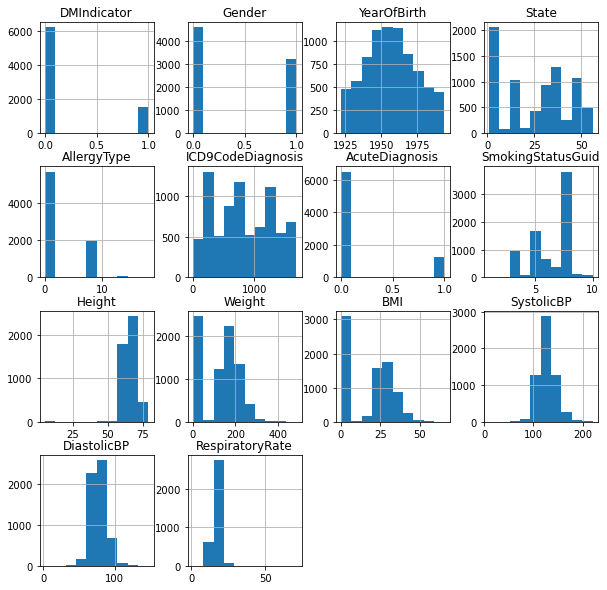

In [8]:
# Plotting the data distribution plots before removing null values
p = diabetes_df.hist(figsize = (10,10))

### Replace null values you just found with mean values for numeric variables 

In [272]:
# imputing the mean value of the column to each missing value of that particular column
diabetes_df_copy['Height'].fillna(diabetes_df_copy['Height'].mean(), inplace = True)
diabetes_df_copy['Weight'].fillna(diabetes_df_copy['Weight'].mean(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].mean(), inplace = True)
diabetes_df_copy['SystolicBP'].fillna(diabetes_df_copy['SystolicBP'].mean(), inplace = True)
diabetes_df_copy['DiastolicBP'].fillna(diabetes_df_copy['DiastolicBP'].mean(), inplace = True)
diabetes_df_copy['RespiratoryRate'].fillna(diabetes_df_copy['RespiratoryRate'].mean(), inplace = True)
diabetes_df_copy['State'].fillna(diabetes_df_copy['State'].mean(), inplace = True)

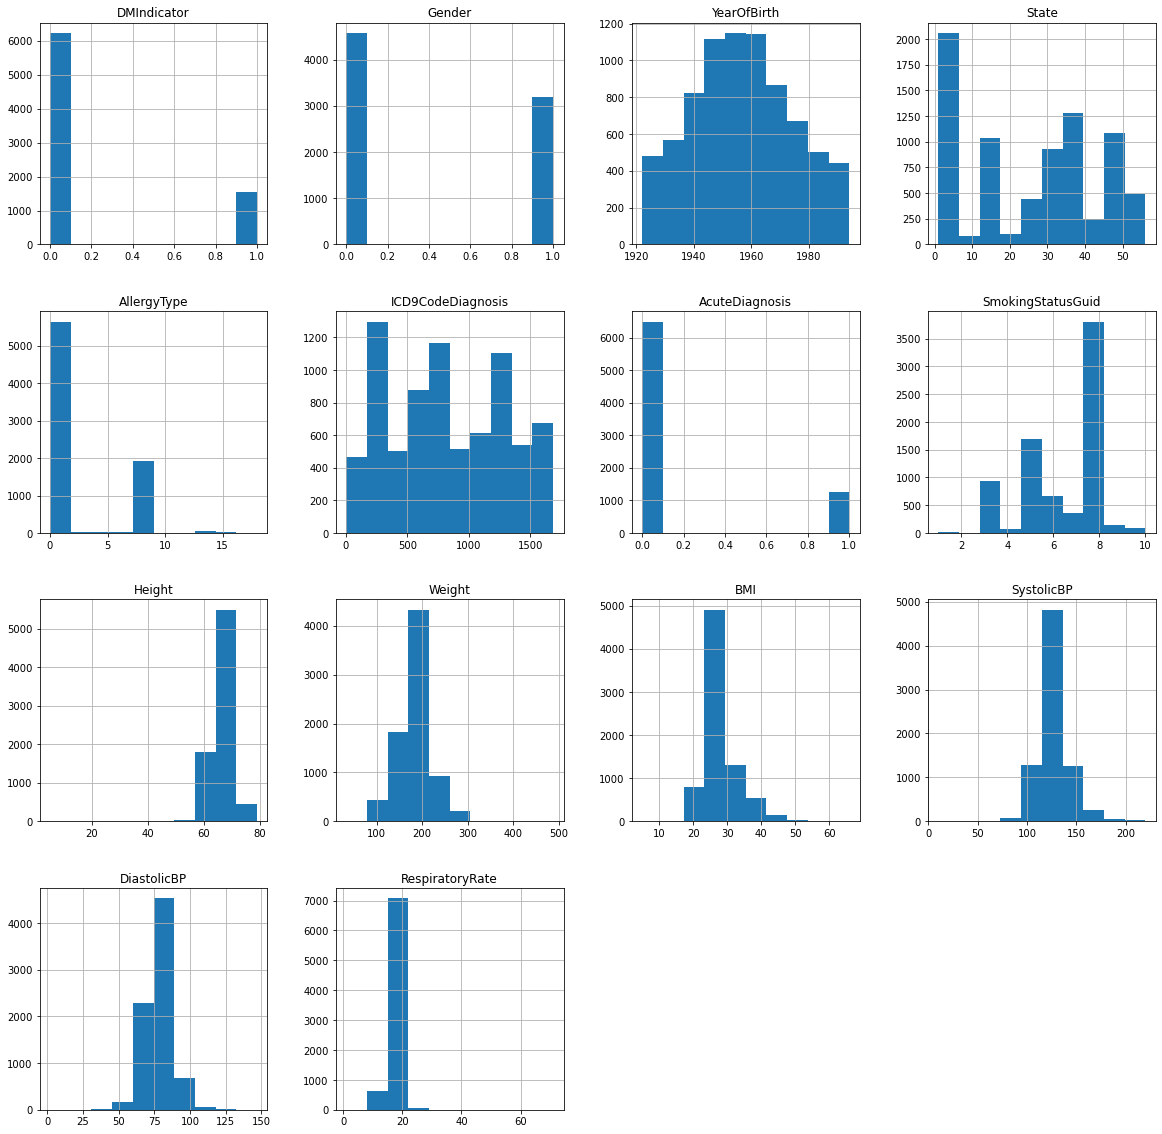

In [89]:
# Plotting the distributions after removing the NAN values.
p = diabetes_df_copy.hist(figsize = (20,20))

# If you are getting a bad prediction score, try removing imputation values from Height-Respiratory rate. Can also try median instead of mean in case outliers are causing issue

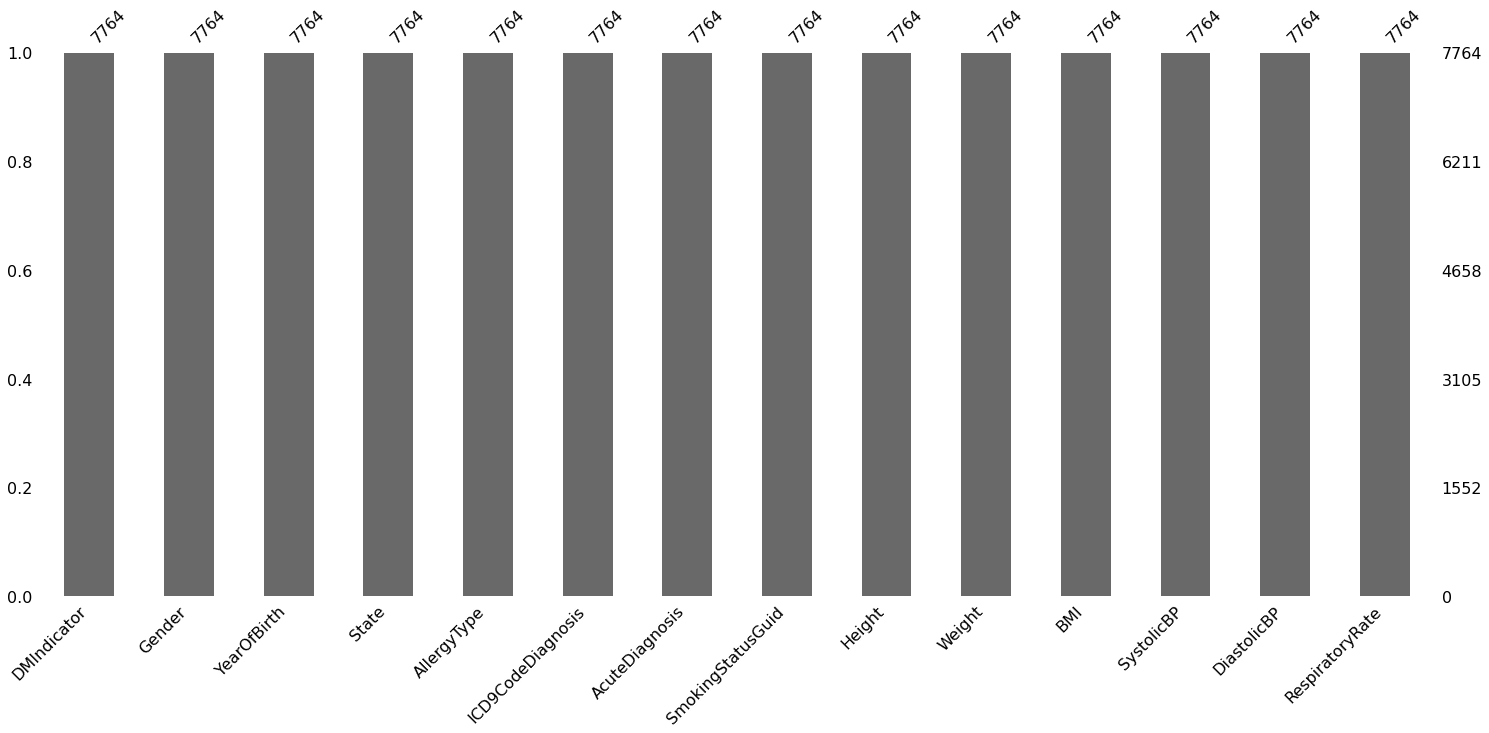

In [273]:
# Check histogram to see if any null values remain (we want no null values. nulls should be either turned into another category or average of sample)
p = msno.bar(diabetes_df_copy)

### Looking at the dataset, we see there is an imbalance between the number of patients with and without diabetes. This can lead to overfitting in your model (model is too complex, which negatively impacts accuracy) 

0    6220
1    1544
Name: DMIndicator, dtype: int64


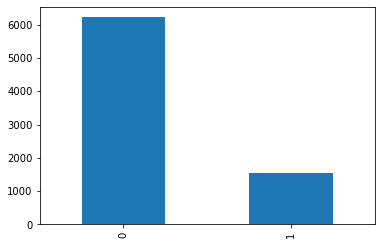

In [274]:
# Check that how well our BMIndicator column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["DMIndicator"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.DMIndicator.value_counts())
p=diabetes_df.DMIndicator.value_counts().plot(kind="bar")

In [275]:
diabetes_df_copy.head()

,DMIndicator,Gender,YearOfBirth,State,AllergyType,ICD9CodeDiagnosis,AcuteDiagnosis,SmokingStatusGuid,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
0,0,1,1929,46.0,0,1626,0,8,65.863557,137.000000,29.129486,142.000000,71.000000,16.737163
1,0,0,1984,34.0,0,566,0,8,65.863557,180.754819,29.129486,126.988695,76.832819,16.737163
2,1,0,1951,40.0,0,1355,0,8,65.863557,252.000000,29.129486,198.000000,82.000000,16.737163
3,1,0,1924,1.0,0,1260,0,8,65.863557,180.754819,29.129486,142.000000,74.000000,20.000000
4,0,0,1981,36.0,0,1626,0,8,65.863557,180.754819,29.129486,110.000000,70.000000,12.000000


### Use standard scaling to scale variables 

In [276]:
# Conduct Standard Scaling 
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["DMIndicator"],axis = 1),), columns=['Gender', 
'YearOfBirth', 'State', 'AllergyType', 'ICD9CodeDiagnosis', 'AcuteDiagnosis', 'SmokingStatusGuid', 'Height',
'Weight', 'BMI', 'SystolicBP', 'DiastolicBP', 'RespiratoryRate'])
X.head()

,Gender,YearOfBirth,State,AllergyType,ICD9CodeDiagnosis,AcuteDiagnosis,SmokingStatusGuid,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
0,1.196482,-1.597386,1.215691,-0.596345,1.704712,-0.441811,0.800192,-3.417598e-14,-1.189755e+00,-4.332492e-15,0.979406,-0.608828,0.000000
1,-0.835784,1.552653,0.483592,-0.596345,-0.518832,-0.441811,0.800192,-3.417598e-14,-2.318478e-15,-4.332492e-15,0.000000,0.000000,0.000000
2,-0.835784,-0.337370,0.849642,-0.596345,1.136240,-0.441811,0.800192,-3.417598e-14,1.937256e+00,-4.332492e-15,4.633101,0.539349,0.000000
3,-0.835784,-1.883753,-1.529681,-0.596345,0.936960,-0.441811,0.800192,-3.417598e-14,-2.318478e-15,-4.332492e-15,0.979406,-0.295689,1.710406
4,-0.835784,1.380833,0.605608,-0.596345,1.704712,-0.441811,0.800192,-3.417598e-14,-2.318478e-15,-4.332492e-15,-1.108420,-0.713207,-2.483259


### Reducing the number of features based on plot of important features yields slightly better Brier Score, so we will use X1 as the input for our test/train datasets instead of X (which has all variables)

In [277]:
# Select PatientGuid and Diabetic as DMIndicator
X1 = X[['YearOfBirth', 'State','ICD9CodeDiagnosis','Weight', 'BMI', 'SystolicBP', 'DiastolicBP', 'RespiratoryRate']]
X1.head()

,YearOfBirth,State,ICD9CodeDiagnosis,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
0,-1.597386,1.215691,1.704712,-1.189755e+00,-4.332492e-15,0.979406,-0.608828,0.000000
1,1.552653,0.483592,-0.518832,-2.318478e-15,-4.332492e-15,0.000000,0.000000,0.000000
2,-0.337370,0.849642,1.136240,1.937256e+00,-4.332492e-15,4.633101,0.539349,0.000000
3,-1.883753,-1.529681,0.936960,-2.318478e-15,-4.332492e-15,0.979406,-0.295689,1.710406
4,1.380833,0.605608,1.704712,-2.318478e-15,-4.332492e-15,-1.108420,-0.713207,-2.483259


In [278]:
# Establish Target Outcome Variable 
y = diabetes_df_copy.DMIndicator
y

0       0
1       0
2       1
3       1
4       0
       ..
7759    0
7760    1
7761    0
7762    0
7763    0
Name: DMIndicator, Length: 7764, dtype: int64

# Model Builing: This is where you create your test and train samples, which we fit with a number of different model types to find the best results

In [325]:
# split the data into training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size=0.33,
                                                    random_state=7)

## Random Forest using SMOTE to manage imbalanced dataset (much more people w/o diabetes than with)
### This improved the gap between F-1 and Accuracy score, but it did not yield a better Brier score than Random Forest w/o SMOTE (which is primary goal). Therefore we will not use 

In [49]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=7)
os_features,os_labels=oversampler.fit_sample(X_train,y_train)

In [50]:
# verify new data set is balanced
len(os_labels[os_labels==1])

4147

In [127]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=2000, random_state=7)
clf.fit(os_features,os_labels)

RandomForestClassifier(n_estimators=2000, random_state=7)

In [128]:
# The very high accuracy score would indicate that the model is overfitted 
clf_train = clf.predict(os_features)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(os_labels, clf_train)))

Accuracy_Score = 0.9991560163973957


In [129]:
from sklearn import metrics

predictions = clf.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8115489660554038


In [130]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[1854  219]
 [ 264  226]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2073
           1       0.51      0.46      0.48       490

    accuracy                           0.81      2563
   macro avg       0.69      0.68      0.68      2563
weighted avg       0.81      0.81      0.81      2563



In [95]:
# Not a great ROC Score. You typically want something between .9 and 1
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.6836897132224814


In [131]:
# Check MSE Score (Synonymous with Brier Score)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

0.18845103394459617

In [132]:
# Get probability scores from dataset 
clf_y_proba = clf.predict_proba(X_test)
clf_y_proba_1 = clf_y_proba[:, 1]


In [133]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, clf_y_proba_1)

0.12624473962125263

## Random Forest: This yields the best accuracy score, SME Loss Reduction, and Brier Score. F-1 score not optimal, but we are not concerned with that for this assignment

In [326]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [327]:
# The very high accuracy score would indicate that the model is overfitted 
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 0.9986541049798116


In [328]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8408115489660554


In [283]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[2012   61]
 [ 349  141]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2073
           1       0.70      0.29      0.41       490

    accuracy                           0.84      2563
   macro avg       0.78      0.63      0.66      2563
weighted avg       0.82      0.84      0.81      2563



In [329]:
# Check MSE Score Lower MSE score the better (Minimization of error in training dataset)
mean_squared_error(y_test, predictions)

0.1591884510339446

In [333]:
# Get probability scores from dataset 
rfc_y_proba = rfc.predict_proba(X_test)
rfc_y_proba_1 = rfc_y_proba[:, 1]
rfc_y_proba_1

array([0.06      , 0.22633333, 0.114     , ..., 0.006     , 0.61      ,
       0.995     ])

In [334]:
# Check Brier Score. .116 is pretty good!! .10 is the current low score  
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, rfc_y_proba_1)

0.1143720112355054

In [335]:
preds = rfc.predict(X_test)
# Convery array with probabilities to dataframe
preds=pd.DataFrame(preds, columns=['DMIndicatorForecast']) 

0    2365
1     198
Name: DMIndicatorForecast, dtype: int64


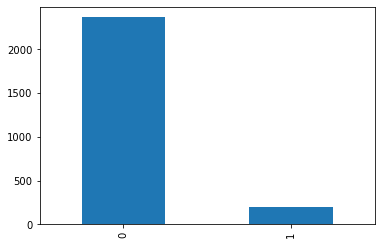

In [337]:
# Check that how well our BMIndicator column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = preds["DMIndicatorForecast"].map(lambda x: color_wheel.get(x + 1))
print(preds.DMIndicatorForecast.value_counts())
p=preds.DMIndicatorForecast.value_counts().plot(kind="bar")

## Decision Tree: Not awful, but not as good as random forest

In [108]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(os_features,os_labels)

DecisionTreeClassifier()

In [109]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7635583300819352


In [110]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[1719  354]
 [ 252  238]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2073
           1       0.40      0.49      0.44       490

    accuracy                           0.76      2563
   macro avg       0.64      0.66      0.65      2563
weighted avg       0.78      0.76      0.77      2563



In [111]:
# Check MSE Score (Synonymous with Brier Score)
mean_squared_error(y_test, predictions)

0.23644166991806476

## XgBoost classifier: Almost as good as random forest, but not quite

In [112]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=1000,
    gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27,
    max_depth = 3,
    min_child_weight = 5)
xgb_model.fit(os_features,os_labels)

[12:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=27, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [113]:
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.8041357783847054


In [114]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[1844  229]
 [ 273  217]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2073
           1       0.49      0.44      0.46       490

    accuracy                           0.80      2563
   macro avg       0.68      0.67      0.67      2563
weighted avg       0.80      0.80      0.80      2563



In [115]:
# Check MSE Score (Synonymous with Brier Score)
mean_squared_error(y_test, xgb_pred)

0.19586422161529457

## Support Vector Machine (SVM): Not good for this model

In [21]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(os_features,os_labels)

SVC()

In [22]:
svc_pred = svc_model.predict(X_test)

In [23]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.6894264533749512


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[1423  650]
 [ 146  344]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      2073
           1       0.35      0.70      0.46       490

    accuracy                           0.69      2563
   macro avg       0.63      0.69      0.62      2563
weighted avg       0.80      0.69      0.72      2563



## Review which features were most important 

<AxesSubplot:>

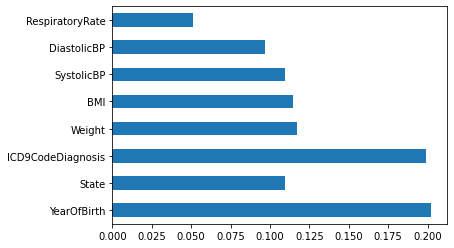

In [32]:
(pd.Series(rfc.feature_importances_, index=X1.columns).plot(kind='barh'))

## Save the Random Forrest Model with the best output by using pickle. This is what we will use on test data 

In [287]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## Check a few samples to see if the predictions are accurate

In [288]:
X1.head()

,YearOfBirth,State,ICD9CodeDiagnosis,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
0,-1.597386,1.215691,1.704712,-1.189755e+00,-4.332492e-15,0.979406,-0.608828,0.000000
1,1.552653,0.483592,-0.518832,-2.318478e-15,-4.332492e-15,0.000000,0.000000,0.000000
2,-0.337370,0.849642,1.136240,1.937256e+00,-4.332492e-15,4.633101,0.539349,0.000000
3,-1.883753,-1.529681,0.936960,-2.318478e-15,-4.332492e-15,0.979406,-0.295689,1.710406
4,1.380833,0.605608,1.704712,-2.318478e-15,-4.332492e-15,-1.108420,-0.713207,-2.483259


In [321]:
# 2nd patient, who is diabetic 
rfc_from_pickle.predict([[-0.337370,0.849642,1.136240,1.937256e+00,-4.332492e-15,4.633101,0.539349,0.000000]]) #2nd patient
# It accurately predicts a diabetes result 

array([1], dtype=int64)

In [323]:
# Patient 0, who is non-diabetic
rfc_from_pickle.predict([[-1.597386,1.215691,1.704712,-1.189755e+00,-4.332492e-15,0.979406,-0.608828,0.000000]]) #Patient 0
# It accurately predicts a non-diabetes result 

array([0], dtype=int64)

In [324]:
# Outputs the probability instead of prediction, which is what is asked for in output
rfc_from_pickle.predict_proba([[-1.597386,1.215691,1.704712,-1.189755e+00,-4.332492e-15,0.979406,-0.608828,0.000000]]) #Patient 0

array([[0.727, 0.273]])

## Incorporation of Test Data: Pulling in sample we will apply trained model to 

In [292]:
test_df = pd.read_csv(r"C:\Users\Nick's Laptop\Desktop\Health Analyics\test_diabetesDF.csv")
test_df.head()

,PatientGuid,Gender,YearOfBirth,State,AllergyType,ICD9CodeDiagnosis,AcuteDiagnosis,SmokingStatusGuid,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
0,000B4862-7CE7-4EC5-8043-A97FCD74BD78,0,1925,42,0,622,0,6,65.0,100.0,16.639,100.0,60.0,18.0
1,003CEE1F-5BF5-4171-9284-F5464EC12D41,0,1926,6,8,587,0,5,61.0,106.0,20.026,130.0,82.0,12.0
2,004382BD-E31F-4091-8DE5-E86A59D70C2D,0,1961,29,0,816,0,8,63.0,242.0,42.864,152.0,92.0,NaN
3,004EA6A7-6159-4D70-B06A-C0391D8623BD,0,1984,46,0,1207,0,8,67.0,142.0,22.238,108.0,72.0,NaN
4,0063B34F-C2C4-423A-A144-E51F7149253A,0,1968,22,8,1319,1,3,67.0,290.0,45.415,133.0,83.0,18.0


In [293]:
# check the number of null values our dataset has.
test_df.isnull().sum()

PatientGuid             0
Gender                  0
YearOfBirth             0
State                   0
AllergyType             0
ICD9CodeDiagnosis       0
AcuteDiagnosis          0
SmokingStatusGuid       0
Height               1331
Weight                  0
BMI                     0
SystolicBP            807
DiastolicBP           807
RespiratoryRate      1824
dtype: int64

In [294]:
# Convert any instances where 0 or NULL was used to NA so to improve authenticity of dataset
test_df_copy = test_df.copy(deep = True)
test_df_copy[['Height','Weight','BMI','SystolicBP','DiastolicBP','RespiratoryRate']] = test_df_copy[['Height','Weight','BMI','SystolicBP','DiastolicBP','RespiratoryRate']].replace(0,np.NaN)

# Showing the Count of NANs
print(test_df_copy.isnull().sum())

PatientGuid             0
Gender                  0
YearOfBirth             0
State                   0
AllergyType             0
ICD9CodeDiagnosis       0
AcuteDiagnosis          0
SmokingStatusGuid       0
Height               1331
Weight               1041
BMI                  1353
SystolicBP            807
DiastolicBP           807
RespiratoryRate      1824
dtype: int64


In [295]:
# imputing the mean value of the column to each missing value of that particular column
test_df_copy['Height'].fillna(test_df_copy['Height'].mean(), inplace = True)
test_df_copy['Weight'].fillna(test_df_copy['Weight'].mean(), inplace = True)
test_df_copy['BMI'].fillna(test_df_copy['BMI'].mean(), inplace = True)
test_df_copy['SystolicBP'].fillna(test_df_copy['SystolicBP'].mean(), inplace = True)
test_df_copy['DiastolicBP'].fillna(test_df_copy['DiastolicBP'].mean(), inplace = True)
test_df_copy['RespiratoryRate'].fillna(test_df_copy['RespiratoryRate'].mean(), inplace = True)

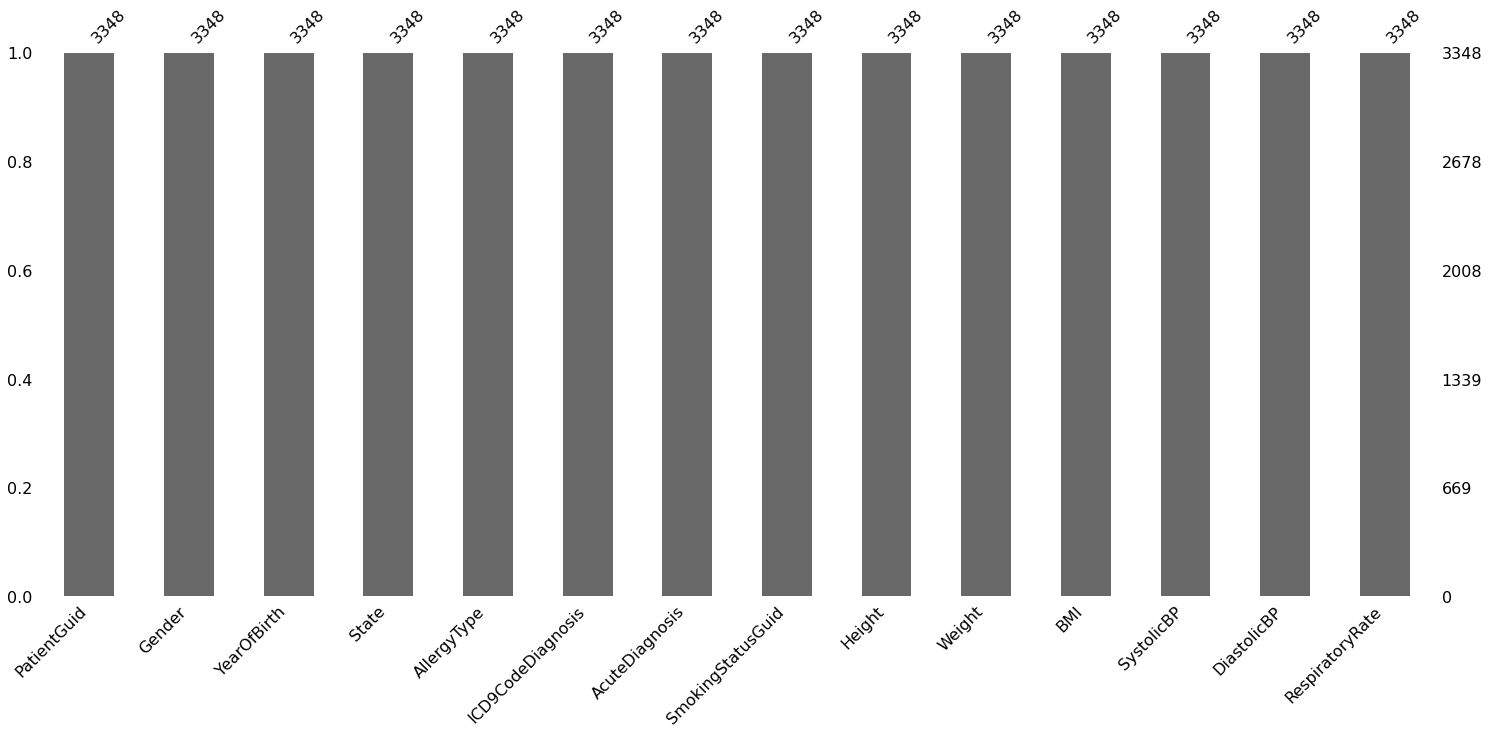

In [296]:
# Check histogram to see if any null values remain (we want no null values. nulls should be either turned into another category or average of sample)
p = msno.bar(test_df_copy)

In [297]:
# Conduct Standard Scaling 
test_sc_X = StandardScaler()
test_X =  pd.DataFrame(test_sc_X.fit_transform(test_df_copy.drop(["PatientGuid"],axis = 1),), columns=['Gender', 
'YearOfBirth', 'State', 'AllergyType', 'ICD9CodeDiagnosis', 'AcuteDiagnosis', 'SmokingStatusGuid', 'Height',
'Weight', 'BMI', 'SystolicBP', 'DiastolicBP', 'RespiratoryRate'])
test_X.head()

,Gender,YearOfBirth,State,AllergyType,ICD9CodeDiagnosis,AcuteDiagnosis,SmokingStatusGuid,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
0,-0.837389,-1.838580,0.940903,-0.453627,-0.378678,-0.427342,-0.370746,-0.229419,-2.134957,-0.941057,-1.883140,-1.799028,7.580571e-01
1,-0.837389,-1.781304,-1.285259,2.100493,-0.452260,-0.427342,-0.924878,-1.390372,-1.974627,-0.696645,0.190528,0.512909,-2.954677e+00
2,-0.837389,0.223337,0.137011,-0.453627,0.029175,-0.427342,0.737519,-0.809896,1.659503,0.951385,1.711218,1.563789,2.198380e-15
3,-0.837389,1.540672,1.188254,-0.453627,0.851188,-0.427342,0.737519,0.351058,-1.012652,-0.537023,-1.330161,-0.537971,2.198380e-15
4,-0.837389,0.624265,-0.295854,2.100493,1.086649,2.340047,-2.033143,0.351058,2.942138,1.135470,0.397895,0.617997,7.580571e-01


In [298]:
# Select PatientGuid and Diabetic as DMIndicator
test_X1 = test_X[['YearOfBirth', 'State','ICD9CodeDiagnosis','Weight', 'BMI', 'SystolicBP', 'DiastolicBP', 'RespiratoryRate']]
test_X1.head()

,YearOfBirth,State,ICD9CodeDiagnosis,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
0,-1.838580,0.940903,-0.378678,-2.134957,-0.941057,-1.883140,-1.799028,7.580571e-01
1,-1.781304,-1.285259,-0.452260,-1.974627,-0.696645,0.190528,0.512909,-2.954677e+00
2,0.223337,0.137011,0.029175,1.659503,0.951385,1.711218,1.563789,2.198380e-15
3,1.540672,1.188254,0.851188,-1.012652,-0.537023,-1.330161,-0.537971,2.198380e-15
4,0.624265,-0.295854,1.086649,2.942138,1.135470,0.397895,0.617997,7.580571e-01


## Once we have cleaned test data exactly like data used to train/test model, we apply rfc model on it

In [299]:
# lastly, after loading that model we will use this to make predictions
test_prob = rfc_from_pickle.predict_proba(test_X1)

In [300]:
rfc_from_pickle.predict_proba(test_X1)

array([[0.505, 0.495],
       [0.745, 0.255],
       [0.74 , 0.26 ],
       ...,
       [0.822, 0.178],
       [0.454, 0.546],
       [0.974, 0.026]])

## Here we are putting PatientGuid back in and formatting per assignment instructions (PatientGuid and DMIndicator Forecast)

In [301]:
# Convert array with probabilities to dataframe
test=pd.DataFrame(test_prob, columns=['Non-Diabetic','DMIndicatorForecast']) 

In [302]:
test.head()

,Non-Diabetic,DMIndicatorForecast
0,0.505,0.495
1,0.745,0.255
2,0.740,0.260
3,0.990,0.010
4,0.808,0.192


In [303]:
# Merge PatientGuid back in with Probabilities 
PatientGuid = test_df_copy["PatientGuid"]
test = test.join(PatientGuid)

In [304]:
# NOTE: PatientGuid and test_prob have same length.
test.tail()

,Non-Diabetic,DMIndicatorForecast,PatientGuid
3343,0.487,0.513,FF9BA1EB-03AB-47FE-B110-B559D8E0835B
3344,0.985,0.015,FFA25126-98E0-46E2-9B80-FBEEEA1C7D71
3345,0.822,0.178,FFB3BB66-F74A-462E-A9B8-F982857B4CB3
3346,0.454,0.546,FFC8E19F-A199-46A3-895A-E3C07FBAC809
3347,0.974,0.026,FFCD70A8-72FC-4F06-AC19-D9962B2CA95E


In [305]:
# Select PatientGuid and Diabetic as DMIndicator
df_export = test[['PatientGuid', 'DMIndicatorForecast']]

In [306]:
df_export.head()

,PatientGuid,DMIndicatorForecast
0,000B4862-7CE7-4EC5-8043-A97FCD74BD78,0.495
1,003CEE1F-5BF5-4171-9284-F5464EC12D41,0.255
2,004382BD-E31F-4091-8DE5-E86A59D70C2D,0.260
3,004EA6A7-6159-4D70-B06A-C0391D8623BD,0.010
4,0063B34F-C2C4-423A-A144-E51F7149253A,0.192


In [307]:
df_export.to_csv(r"C:\Users\Nick's Laptop\Desktop\Health Analyics\test_SyncPatientForecastv2.csv", sep=',')

In [313]:
preds = rfc_from_pickle.predict(test_X1)
# Convery array with probabilities to dataframe
preds=pd.DataFrame(preds, columns=['DMIndicatorForecast']) 

0    3219
1     129
Name: DMIndicatorForecast, dtype: int64


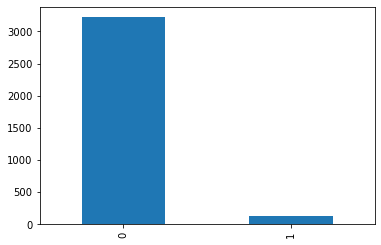

In [314]:
# Check that how well our BMIndicator column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = preds["DMIndicatorForecast"].map(lambda x: color_wheel.get(x + 1))
print(preds.DMIndicatorForecast.value_counts())
p=preds.DMIndicatorForecast.value_counts().plot(kind="bar")

### Check random samples to ensure PatientGuid aligns with the correct DMIndicator

In [317]:
df_export.iloc[[675]]

,PatientGuid,DMIndicatorForecast
675,35441C52-1D32-4126-BD11-E1D465D492B1,0.259


In [318]:
# We can see that index 675 is the same Patient in the test_df_copy db we convert to X1 prior to stripping PatientGuid
test_df_copy.iloc[[675]]

,PatientGuid,Gender,YearOfBirth,State,AllergyType,ICD9CodeDiagnosis,AcuteDiagnosis,SmokingStatusGuid,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
675,35441C52-1D32-4126-BD11-E1D465D492B1,1,1962,12,0,1284,0,8,74.0,257.0,32.993,108.0,62.0,14.0


In [319]:
# Now let's get the X1 row that should correspond to this patient
test_X1.iloc[[675]]

,YearOfBirth,State,ICD9CodeDiagnosis,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate
675,0.280612,-0.914232,1.013067,2.060326,0.239076,-1.330161,-1.588852,-1.717099


In [320]:
# Now let's check X1 to see if we can reproduce the same DMIndicatorForecast, which we can 
rfc_from_pickle.predict_proba([[0.280612,-0.914232,1.013067,2.060326,0.239076,-1.330161,-1.588852,-1.717099]]) 

array([[0.741, 0.259]])